<a href="https://colab.research.google.com/github/Bhagyeshkasar/Student-s-Alcohol-Consumption-Analysis/blob/main/Student_Alcohol_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Student Alcohol Consumption Data
In this project we use a dataset containing information about students from two public schools.This is real world dataset that was collected in order to study alcohol consumption in young people and its effects on students academic performance.

Short exploratory data analysis focusing on the alcohol variables from the Portuguese school dataset. Our main goal is using Data Mining To Predict School Student Alcohol Consumption and finding the significant factors.


Step 1. Import the necessary libraries

In [66]:
#import all the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt, arange
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings

warnings.simplefilter("ignore") #to ignore warning messages

##Information of column name and data in the dataset
* 1. school:- Student's School(GP-Gabrial Pereira or MS- Mousinho Da Silverira)
* 2. sex:- Student's Sex(F- Female or M- Male)
* 3. age:- Student's age
* 4. adress:- Student's home address(U- Urban or R- Rural)
* 5. famsize:- Family size(LE3- Less or equal to 3 and GT3- Greater than 3)
* 6. Pstatus:- parent's cohabition status(T- Living together or A- Apart)
* 7. Medu:-Mother's education(0-None,1-Primary(4th grade), 2- 5th to 9th, 3- Secondary or 4- Higher education)
* 8. Fedu:- Father's education(0-None,1-Primary(4th grade), 2- 5th to 9th, 3- Secondary or 4- Higher education)
* 9. Mjob:- Mother's job('teacher', 'health' care related, civil 'Services, 'at_home' or 'other')
* 10. Fjob:- Father's job('teacher', 'health' care related, civil 'Services, 'at_home' or 'other')
* 11. guardian:- Student's guardian('mother','father' or 'other')
* 12. traveltime - home to school travel time ( 1 - 1 hour)
* 13. studytime - weekly study time ( 1 - 10 hours)
* 14. failures- number of past class failures (numeric: n if 1<=n<3, else 4)
* 15. schoolsup - extra educational support ( yes or no)
* 16. famsup - family educational support ( yes or no)
* 17. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* 18. activities - extra-curricular activities (yes or no)
* 19. nursery - attended nursery school ( yes or no)
* 20. higher - wants to take higher education ( yes or no)
* 21. internet - Internet access at home ( yes or no)
* 22. romantic - with a romantic relationship ( yes or no)
* 23. famrel - quality of family relationships ( from 1 - very bad to 5 - excellent)
* 24. freetime - free time after school ( from 1 - very low to 5 - very high)
* 25. goout - going out with friends ( from 1 - very low to 5 - very high)
* 26. Dalc - workday alcohol consumption ( from 1 - very low to 5 - very high)
* 27. Walc - weekend alcohol consumption ( from 1 - very low to 5 - very high)
* 28. health - current health status ( from 1 - very bad to 5 - very good)
* 29. absences - number of school absences ( from 0 to 93) #### These grades are related with the course subject, Math or Portuguese:
* 30. reason - reason to choose this school(close to 'home',school 'reputation','course' preference or 'other')

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

#Read the Data

In [67]:
df = pd.read_csv('/content/student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_Total
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,16
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,25
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,44
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,27
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,46
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,25
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,33


In [68]:
df.head(10) #inspecting top Ten rows

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_Total
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,16
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,25
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,44
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,26
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15,45
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11,35
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6,17
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19,53
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15,44


In [69]:
df.columns #Names of columns in the dataset

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'G_Total'],
      dtype='object')

In [70]:
df.shape # Shape of the dataset

(395, 34)

In [71]:
df.info() # All information regarding data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [72]:
df.isnull().sum() # Calculating null value in dataset

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
G_Total       0
dtype: int64

Univariate Analysis

In [73]:
df.describe() #Describe all numeric values

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_Total
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,32.037975
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,11.090357
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,25.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,32.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,40.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,58.000000


#Data Cleaning

In [74]:
df.info() #Shows number of missing values and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [75]:
df.isnull().sum() #Counting the number of all values in each columns

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
G_Total       0
dtype: int64

In [76]:
df1 = df.dropna() #Dropping all the null values

In [77]:
df.age.describe() #describing age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [78]:
df.age.unique() #age class in the dataset

array([18, 17, 15, 16, 19, 22, 20, 21])

In [79]:
df.age.value_counts() #Count no. of age

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [80]:
df.Mjob.unique() #Mjob class in the dataset

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [81]:
df.Mjob.value_counts() #Count no. of Mjob

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [82]:
df.guardian.unique() #Mjob class in the dataset

array(['mother', 'father', 'other'], dtype=object)

In [83]:
df.guardian.value_counts() #Count no. of guardian

mother    273
father     90
other      32
Name: guardian, dtype: int64

In [84]:
# create Grand Total by adding all grades
df['G_Total'] = df['G1']+df['G2']+df['G3']

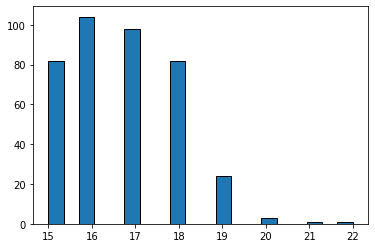

In [85]:
plt.hist(df.age,bins=20,edgecolor='k')
plt.show()

In [86]:
cat_col= df.select_dtypes(include='object')  #Categorical column
cat_col

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [87]:
#Descriptive statistics for object type variables in the dataframe
df.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [88]:
cat_col.apply(lambda x : x.unique()) #Unique values

school                                           [GP, MS]
sex                                                [F, M]
address                                            [U, R]
famsize                                        [GT3, LE3]
Pstatus                                            [A, T]
Mjob          [at_home, health, other, services, teacher]
Fjob          [teacher, other, services, health, at_home]
reason                  [course, other, home, reputation]
guardian                          [mother, father, other]
schoolsup                                       [yes, no]
famsup                                          [no, yes]
paid                                            [no, yes]
activities                                      [no, yes]
nursery                                         [yes, no]
higher                                          [yes, no]
internet                                        [no, yes]
romantic                                        [no, yes]
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f590fd5d110>]],
      dtype=object)

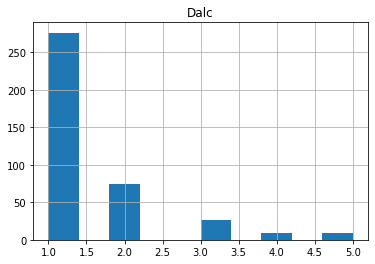

In [89]:
df.hist(column='Dalc')

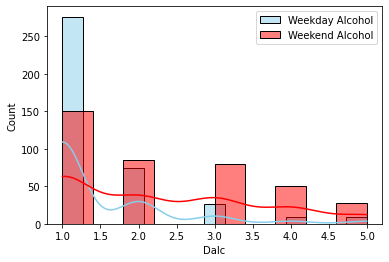

In [90]:
##plot of Weekday Alcohol & Weekend Alcohol 
sns.histplot(data=df, x="Dalc", color="skyblue", label="Weekday Alcohol", kde=True)
sns.histplot(data=df, x="Walc", color="red", label="Weekend Alcohol", kde=True)

plt.legend() 
plt.show()

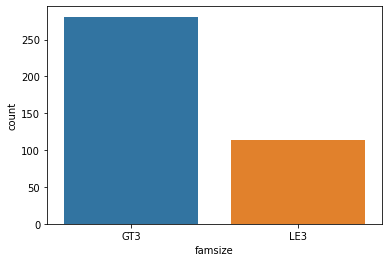

In [91]:
sns.countplot(x= 'famsize',data=df) #Show count plot of famsize
plt.show()

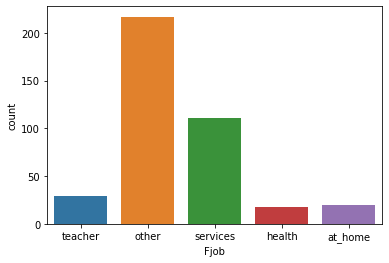

In [92]:
sns.countplot(x= 'Fjob',data=df) #Show count plot of Fjob
plt.show()

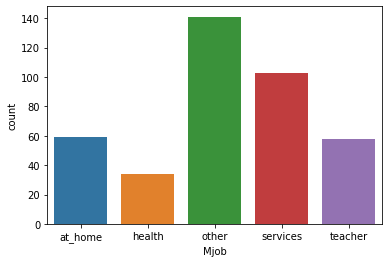

In [93]:
sns.countplot(x= 'Mjob',data=df) #Show count plot of Mjob
plt.show()

In [94]:
df.sex.value_counts() # no. of female and male

F    208
M    187
Name: sex, dtype: int64

In [95]:
df1.rename(columns={'G1':'G1_Mat', 'G2':'G2_Mat', 'G3':'G3_Mat'}, inplace=True)

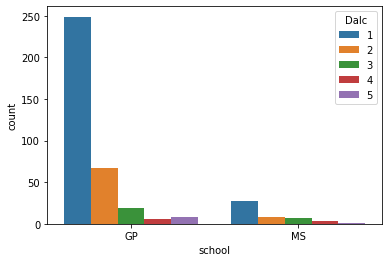

In [96]:
# school vs alcohol consumption on workday
sns.countplot(data=df,x='school',hue='Dalc')

So alcohol consumption on workday is more in GP comparible to MS and they most of are level 1 consumer of alcohol

#Data Visualization

Q.1)Find how many Male & Female are present in dataset (Genderdestribution in percentage) 

In [97]:
sex = df.sex.value_counts()

In [98]:
plt.figure(figsize=(1.5,3))
s = px.pie(names=["Male", "Female"], values=sex.values, title="Gender of students")
s.update_traces(textfont_size=20)
s.show()

<Figure size 108x216 with 0 Axes>

Age of student's

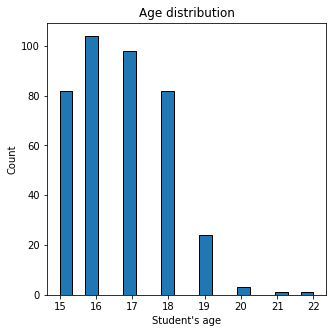

In [99]:
plt.figure(figsize=(5,5))     #Size of graph
plt.title('Age distribution') #Tittle of graph
plt.xlabel("Student's age")  #labelling on x bar
plt.ylabel('Count')          #labelling on y bar
plt.hist(df.age,bins=20,edgecolor='k')
plt.show()

Q.2) Distribution of student's gender over schools

In [100]:
school_sex = df.groupby(["school", "sex"])["age"].count().reset_index()
school_sex.columns = ["school", "sex", "count"] 

In [101]:
plt.figure(figsize=(2,2))
fig = px.bar(school_sex, x="school", y="count", color='sex', barmode="group")
fig.update_layout(yaxis_title="Number of students", title="Gender distribution of students by schools")
fig.show()

<Figure size 144x144 with 0 Axes>

Q.3)How many parent's is not living together ?

In [102]:
P_status = df[df['Pstatus'] != 'T'] #Parent's is not living together

In [103]:
P_status.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_Total
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,17
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6,17
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19,53
14,GP,M,15,U,GT3,A,2,2,other,other,home,other,1,3,0,no,yes,no,no,yes,yes,yes,yes,4,5,2,1,1,3,0,14,16,16,46
28,GP,M,16,U,LE3,A,3,4,services,other,home,mother,1,2,0,yes,yes,no,yes,yes,yes,yes,no,5,3,3,1,1,5,4,11,11,11,33


In [104]:
P_status.shape #Shape 

(41, 34)

Q.4) Comparision of age and reason

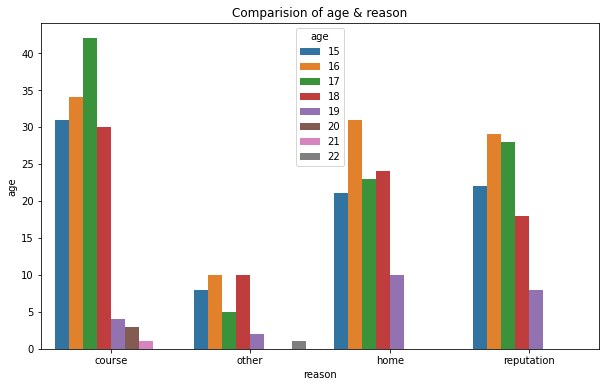

In [105]:
plt.figure(figsize=(10,6))
sns.countplot(x= 'reason',data=df,hue='age')
plt.title('Comparision of age & reason') #Tittle of graph
plt.ylabel('age') 

plt.show()

In above anaylis Mostly age between 15-19 are more engaged in daily consumption of alcohol but they are in initial drinking stage

Q.5) Parent's education and job

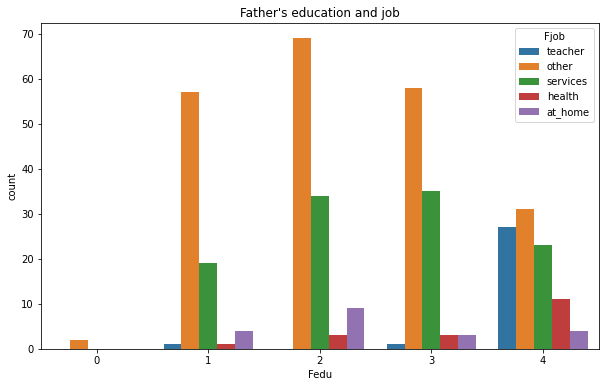

In [106]:
plt.figure(figsize=(10,6))
sns.countplot(x= 'Fedu',data=df,hue='Fjob')
plt.title("Father's education and job")

plt.show()

Q.6) how much they drink a week and how much they drink a day.
In description, there are 2 features in alcohol consumption

Dalc : workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
Let's see if these students know how much they drink a week and how much they drink a day.

In [107]:
plt.figure(figsize=(10,6))
fig = px.histogram(df, x='Dalc', y='Dalc', color='Walc')
fig.show()

<Figure size 720x432 with 0 Axes>

Q 7) Comparision of Sex and age of student's

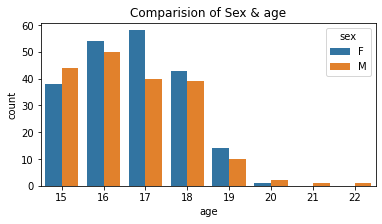

In [108]:
plt.figure(figsize=(6,3))
sns.countplot(x= 'age',data=df,hue='sex')
plt.title('Comparision of Sex & age') #Tittle of graph
plt.ylabel('count') 

plt.show()

Q. 7) Find the family size of student's

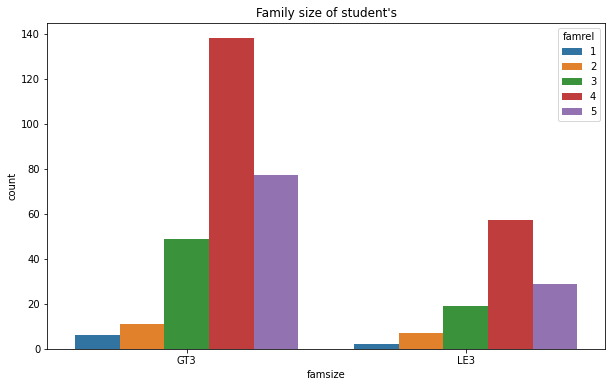

In [109]:
plt.figure(figsize=(10,6))
sns.countplot(x= 'famsize',data=df,hue='famrel')
plt.title("Family size of student's") #Tittle of graph
plt.ylabel('count') 

plt.show()

Q. 8 Job qualifications of parents segregated on how much a student receives family support from parents. Be it financially or personally.

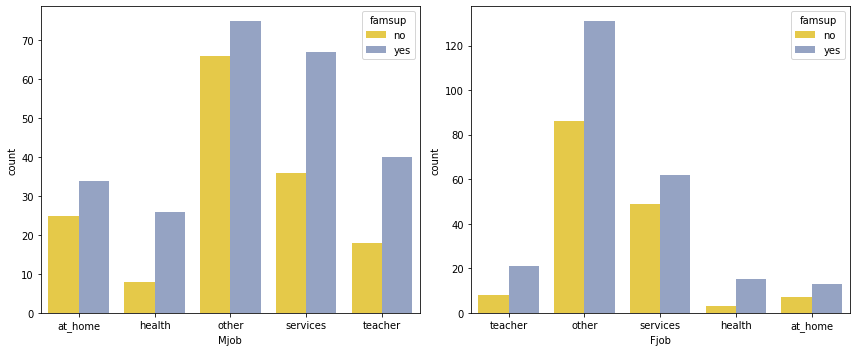

In [110]:
cols=['Mjob','Fjob']
fig=plt.figure()
for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(12,5)
    sns.countplot(x=col,data=df,hue='famsup',palette='Set2_r')
    plt.tight_layout()

Q. 9) Are students in romantic relationships drinking more than single students?

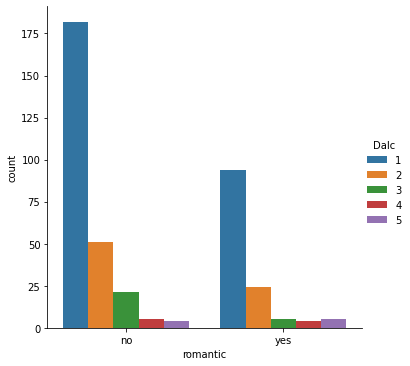

In [111]:
#countplot for romantic vs Dalc
sns.catplot(x='romantic',hue='Dalc',data=df,kind='count')

As we see romantic relation have an impact on alcohol consumption.Those who are not in a Relationship,consumes more alcohol then those who are in relationship

Q. 10)Let's check what is the affect of relationship on Alcohol consumption and Total grade

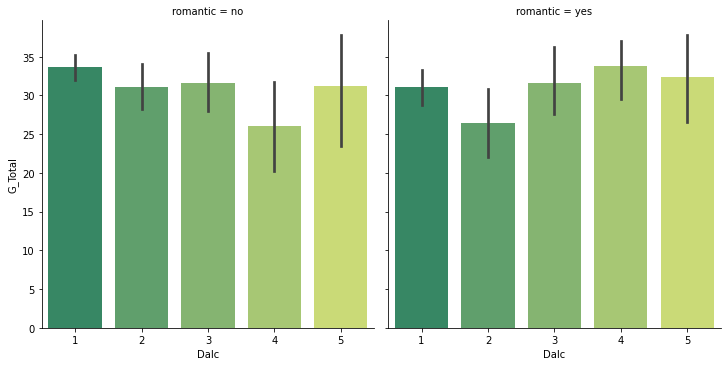

In [112]:
sns.catplot(x='Dalc',y='G_Total',col='romantic',data=df,kind='bar',palette='summer')

Those who are in relationship and also consume alcohol doesn't much impact on their Grades

#Summary and Conclusion
Greater proportion of mothers achieved higher education levels.
Parents’ education levels demonstrate a positive correlation with the academic performance of students.
Female students achieved a higher score than male students across all three grades.
Students who consume less alcohol over the weekend / schooldays perform better academically.
Number of past class failures, student age, first grade and second grade are significant predictors for final grade’s logistic regression model.